#### UE Statistique et Informatique                                                                                                          
### Claire BOISSON et Rania MERZOUK

# Chaines de Markov et épidémiologie : propagagtion d'une épidémie dans une population

### 1. Description du modèle

Soit $P$ la matrice de transition.
$$P = \begin{pmatrix} 0.9&0.1&0 \\ 0&0.5&0.5 \\ 0&0&1 \end{pmatrix}$$ <br/>

Cette matrice est une matrice carrée et chaque élément est un réel positif. De plus la somme des éléments de chaque ligne vaut 1: 
              * ligne 1 = 0,9 + 0,1 = 1 
              * ligne 2 = 0,5 + 0,5 = 1 
              * ligne 3 = 1 
Ainsi, cette matrice est une matrice stochastique.

Soit $\pi_0$ la distribution de probabilité initiale.
\begin{align}
    \pi_0 &= \begin{bmatrix}
           0.9&0.1&0
         \end{bmatrix}
  \end{align}

### 2. Tirage aléatoire des états

In [1]:
# Liste des états possibles
etats = ["S","I","R"]

# Matrice de transition pour notre exemple du projet
transitionMatrice = [[0.9,0.1,0],[0,0.5,0.5],[0,0,1]]

# Distribution de probabilite initiale
pi_0 = [0.9,0.1,0]

In [15]:
from random import *
import numpy as np
import matplotlib.pyplot as plt

# Test de la matrice de transition
#if sum(transitionMatrice[0])+sum(transitionMatrice[1])+sum(transitionMatrice[2]) != 3:
#print("erreur dans la matrice")
#else: print("OK")

""""Fonction qui retourne la nouvelle probabilite qui est le produit de la probabilite precedente et la probabilite de transition en fonction de l'état suivant, et retourne aussi l'état 
de la personne au jour suivant"""
def prochainEtat(transitionVecteur,prob):
    etatSuivant = np.random.choice(etats,replace=True,p=transitionVecteur)
    if etatSuivant == "S":
        return prob * transitionVecteur[0], etatSuivant
    if etatSuivant == "I":
        return prob * transitionVecteur[1], etatSuivant
    if etatSuivant == "R":
        return prob * transitionVecteur[2], etatSuivant

In [16]:
# Fonction pour générer une séquence d'états pour une personne suivant le modèle de Markov
def generateurSequence(jours):
    
    # Choix de l'état initial en fonction de la distribution des probabilités initiales, pi_0
    etatDuJour = np.random.choice(etats,replace=True,p=pi_0)
    print("\nEtat initial : " + etatDuJour)
    listeEtats = [etatDuJour]
    
    # Initialisation de prob avec la distribution des probabilites initiales, pi_0
    if etatDuJour == "S":
        prob = pi_0[0]
    if etatDuJour == "I":
        prob = pi_0[1]
    if etatDuJour == "R":
        prob = pi_0[2]

    """"En fonction de l'etat actuel, la fonction prochainEtat() permet de calculer la probabilité et de 
    mettre à jour l'état suivant. Cet état suivant et ensuite ajouter dans une liste d'états permettant de 
    créer la séquence pour une personne"""
    i = 1
    while i < jours:
        if etatDuJour == "S":
            prob, etatDuJour = prochainEtat(transitionMatrice[0],prob)
            listeEtats.append(etatDuJour)
            i += 1
            continue
        if etatDuJour == "I":
            prob, etatDuJour = prochainEtat(transitionMatrice[1],prob)
            listeEtats.append(etatDuJour)
            i += 1
            continue
        if etatDuJour == "R":
            prob, etatDuJour = prochainEtat(transitionMatrice[2],prob)
            listeEtats.append(etatDuJour)
            i += 1
            continue

    print("\nSéquence d'états : \n" + str(listeEtats))
    print("\nLa probabilité de la séquence d'états vaut : " + str(prob))

In [17]:
# Test pour générer une séquence pour une personne pendant 50 jours
generateurSequence(50)


Etat initial : S

Séquence d'états : 
['S', 'S', 'I', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R']

La probabilité de la séquence d'états vaut : 0.04050000000000001


### 3. Probabilité d'une séquence

In [23]:
"""Fonction qui renvoie la nouvelle probabilité qui est le produit entre la porbabilité précédente et la probabilité de transition en fonction de l'état suivant"""
def probaTransition(transitionVecteur,prob,prochainEtat):
    if prochainEtat == "S":
        return prob * transitionVecteur[0]
    if prochainEtat == "I":
        return prob * transitionVecteur[1]
    if prochainEtat == "R":
        return prob * transitionVecteur[2]

In [19]:
# Fonction qui calcule la probabilité d'une séquence donnée en parametre
def getProbaSequence(sequence):

    # Initialisation de prob avec l'aide de la distribution des probabilités initiales, pi_0
    if sequence[0] == "S":
        prob = pi_0[0]
    if sequence[0] == "I":
        prob = pi_0[1]
    if sequence[0] == "R":
        prob = pi_0[2]

    # Parcours de la séquence pour mettre à jour la probabilité en fonction des transitions d'états
    for i in range(1,len(sequence)):
        etatDuJour = sequence[i-1]
        prochainEtat = sequence[i]

        if etatDuJour == "S":
            prob = probaTransition(transitionMatrice[0],prob,prochainEtat)
            continue
        if etatDuJour == "I":
            prob = probaTransition(transitionMatrice[1],prob,prochainEtat)
            continue
        if etatDuJour == "R":
            prob = probaTransition(transitionMatrice[2],prob,prochainEtat)
            continue

    print("\nLa probabilité de la séquence ["+sequence+"] vaut : " + str(prob))

In [20]:
# Test des séquences données dans le projet pour afficher leurs probabilités
seq1 = "SSSSSSIIIIIIIIIIIR"
seq2 ="SSSSSSSSSSSSIIIR"

In [21]:
getProbaSequence(seq1)


La probabilité de la séquence [SSSSSSIIIIIIIIIIIR] vaut : 2.594926757812501e-05


In [22]:
getProbaSequence(seq2)


La probabilité de la séquence [SSSSSSSSSSSSIIIR] vaut : 0.0035303692060125024


###### Interprétation des résultats

À partir de ces résultats, nous pouvons constater que la probabilité pour une personne initialement saine d’être infectée et de le rester longtemps est très faible. En effet, pour la première séquence où la personne reste infectée 11 jours sur 18 jours, nous avons une probabilité de 2.59e-5. <br/>
Tandis que le cas où une personne saine, le restant longtemps, devient infectée et le reste seulement quelques jours, possède une probabilité plus élevée que la séquence 1. En effet, pour la séquence 2, nous n’avons que 3 jours sur les 18 en tant que infecté et une probabilité de 0.0035.

### 4. Modélisation d'une population

In [24]:
"""Fonction présente dans le fichier generateursequence.py, modification : elle retourne la liste des    
états"""
# i.e la séquence pour une personne
def generateurSequence(jours):
    
    etatDuJour = np.random.choice(etats,replace=True,p=pi_0)
    listeEtats = [etatDuJour]
    
    if etatDuJour == "S":
        prob = pi_0[0]
    if etatDuJour == "I":
        prob = pi_0[1]
    if etatDuJour == "R":
        prob = pi_0[2]

    i = 1
    while i < jours:
        if etatDuJour == "S":
            prob, etatDuJour = prochainEtat(transitionMatrice[0],prob)
            listeEtats.append(etatDuJour)
            i += 1
            continue
        if etatDuJour == "I":
            prob, etatDuJour = prochainEtat(transitionMatrice[1],prob)
            listeEtats.append(etatDuJour)
            i += 1
            continue
        if etatDuJour == "R":
            prob, etatDuJour = prochainEtat(transitionMatrice[2],prob)
            listeEtats.append(etatDuJour)
            i += 1
            continue

    return listeEtats

In [25]:
# Fonction qui appelle la fonction generateurSequence(jours) n fois pour nbJours, n'étant le nombre de personnes
# Elle retourne une liste de sequences
def generateurPopulation(nbPersonne, nbJours):
    listePopulation=list()

    # Parcours de la liste de personnes pour ajouter nos séquences générées par la fonction generateurSequence()
    for i in range(nbPersonne):
        listePopulation.append(generateurSequence(nbJours))
    return listePopulation

In [26]:
# Fonction qui permet de trier des personnes dans des listes d'états (sains, infectes, remis) en fonction des 
# jours
#Cette fonction retourne ces listes d'états
def triPopulation(listePopulation, nbJours):
    listeSains=list()
    listeInfectes=list()
    listeRemis=list()

    # Parcours comme dans une matrice, les colonnes étant les jours et les lignes, les personnes
    # Parcours de chaque colonne/jour pour mettre à jour les compteurs (sains, infectes, remis) en fonction 
    # des états de chaque ligne/personne
    for j in range(nbJours):
        cptS = 0
        cptI = 0
        cptR = 0
        for p in range(len(listePopulation)):
            if listePopulation[p][j] == "S":
                cptS += 1
            if listePopulation[p][j] == "I":
                cptI += 1
            if listePopulation[p][j] == "R":
                cptR += 1

        listeSains.append(cptS)
        listeInfectes.append(cptI)
        listeRemis.append(cptR)

    return listeSains, listeInfectes, listeRemis

In [27]:
# Fonction qui génère le graphique de l'évolution déune épidemie grâce aux listes d'états données par la 
# fonction triPopulation()
# en abscisse le nombre de jours, en ordonnee le nombre de personnes
def generateurGraphique(nbPersonne, nbJours):

    # On génère des séquences pour la population
    listePopulation = generateurPopulation(nbPersonne,nbJours)

    # On produit les listes d'états (sains, infectes, remis)
    listeSains, listeInfectes, listeRemis = triPopulation(listePopulation, nbJours)

    # Affichage du graphique
    plt.figure(1)
    plt.title('Evolution d\'une pandemie')
    plt.xlabel('Jours')
    plt.ylabel('Nombre de personnes')
    plt.plot(listeSains,'b',label='sain.e.s')
    plt.plot(listeInfectes,'r',label='infecte.e.s')
    plt.plot(listeRemis,'g',label='gueri.e.s')
    plt.legend()
    plt.show()

##### Test de l'evolution d'une epidemie pour une population de 20 000 personnes durant 50 jours

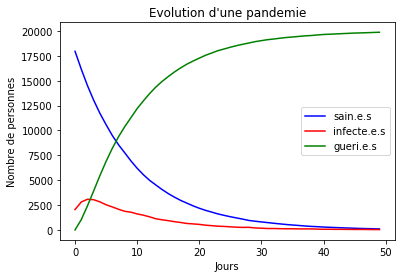

In [14]:
generateurGraphique(20000,50)

**Question 4.2** <br/>
Le graphique représente l’évolution d’une pandémie selon notre modèle de la partie 1 pour 20 000 personnes pendant 50 jours. <br/>
Nous pouvons observer que le nombre de personnes infectées atteint un pic à environ 2 500 cas, soit environ 12% de notre population, lors des cinq premiers jours. <br/>
Néanmoins, ce pic s'atténue nettement pour tendre vers lse 0 cas et pour ensuite l’atteindre dès le 25ème jour. 
Ensuite, la courbe représentant les personnes saines est une courbe exponentielle inverse, et atteint les 0 cas à partir du 40ème jour. <br/>
En revanche, la courbe des personnes guéries est une courbe exponentielle et atteint le seuil des 20 000 cas le 40ème jour. Cette courbe est donc complémentaire avec celle des personnes saines additionné à celle des personnes infectées. <br/>
Cette observation est logique, puisque le virus ou la bactérie étudié.e ici n’a pas de taux de mortalité et une personne guérie ne peut redevenir infectée. <br/>
Ainsi, le schéma logique pour la population saine est d’être infectée, puis d’être guérie et pour ceux qui sont initialement infectés, ils n’ont plus qu’à attendre d’être guéris.

### 5. Modification du modèle

On rappelle les valeurs initiales:
$$P = \begin{pmatrix} 0.9&0.1&0 \\ 0&0.5&0.5 \\ 0&0&1 \end{pmatrix}$$ <br/>
\begin{align}
    \pi_0 &= \begin{bmatrix}
           0.9&0.1&0
         \end{bmatrix}
  \end{align}
  
 Taille population = 20 000 <br/>
 Nombre de jours = 50

##### Cas 1: On augmente la probabilité d'être infecté

$$P = \begin{pmatrix} 0.6&0.4&0 \\ 0&0.5&0.5 \\ 0&0&1 \end{pmatrix}$$ <br/>

Nous avons ici augmenté la probabilité pour une personne saine d’être infecté, ainsi rester sain a une probabilité de 0,6 (contre 0,9) et devenir infecté en a une de 0,4 (contre 0,1).

In [71]:
transitionMatrice = [[0.6,0.4,0],[0,0.5,0.5],[0,0,1]]

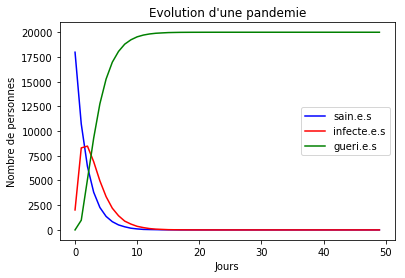

In [72]:
# Test de l'évolution d'une épidemie pour une population de 20 000 personnes durant 50 jours
generateurGraphique(20000,50)

Le graphique ci-dessus représente l’évolution d’une pandémie pour notre cas n°1 avec une population de 20 000 personnes durant 50 jours. <br/>
Ici, la différence que nous pouvons constater est que la courbe des infectés a un pic beaucoup plus élevé que la courbe initiale (question 4.2), avec environ 7 500 cas, soit 37%. <br/>
De plus, ce pic diminue rapidement pour atteindre les 0 cas dès le 10ème jour (contre 25ème initialement). <br/>
De ce fait, la courbe des personnes saines diminuent drastiquement et atteint les 0 cas avant le 10ème jour (contre 40ème initialement). <br/>
Ainsi, la courbe des guéris augmente très fortement puisqu’elle est complémentaire à la somme des cas sains et infectés, et il est normal qu’elle atteigne les seuil max de 20 000 personnes après le 10ème jour. <br/>
Pour conclure, ce graphique représente une version accélérée du graphique initial.

##### Cas 2: On augmente la probabilité d'être infecté et de le rester

La matrice de transition devient: $$P = \begin{pmatrix} 0.6&0.4&0 \\ 0&0.8&0.2 \\ 0&0&1 \end{pmatrix}$$ <br/>

In [73]:
transitionMatrice = [[0.6,0.4,0],[0,0.8,0.2],[0,0,1]]

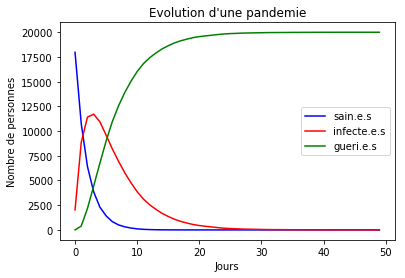

In [74]:
# Test de l'évolution d'une épidemie pour une population de 20 000 personnes durant 50 jours
generateurGraphique(20000,50)

Ce graphique diffère du cas n°1 uniquement par le fait que la probabilité de rester infecté est plus importante.
En effet, nous pouvons constater que la courbe des infectés atteint un pic plus important, à 12 500 cas environ, et ce pic diminue pour atteindre les 0 cas au bout de 25ème jour. <br/>
Pour ce qui est de la courbe des individus sains, nous observons aucune différence avec le cas n°1. <br/>
Puis, pour la courbe des individus guéris, courbe étant la somme des deux courbes précédentes, celle ci diffère du cas n°1. En effet, elle atteint son seuil maximum au 25ème jour, ce qui est cohérent avec l’observation de notre courbe des infectés. <br/>
Il s’agit donc ici d’une version où le fait d’être infecté est accéléré comparé au cas initial, mais le fait de devenir guéri est plus lent que dans le cas n°1. 


##### Cas 3: On augmente la probabilité d'être infecté, de guérir puis de redevenir infecté

La matrice de transition devient: $$P = \begin{pmatrix} 0.6&0.4&0 \\ 0&0.8&0.2 \\ 0&0.05&0.95 \end{pmatrix}$$ <br/>

In [76]:
transitionMatrice = [[0.6,0.4,0],[0,0.8,0.2],[0,0.05,0.95]]

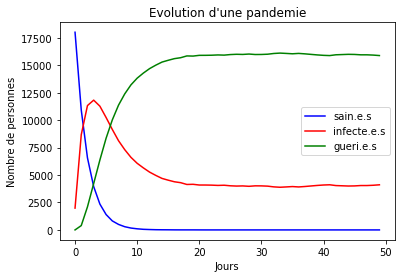

In [77]:
# Test de l'évolution d'une épidemie pour une population de 20 000 personnes durant 50 jours
generateurGraphique(20000,50)

Ce graphique représente l’évolution d’une épidémie pour une population de 20 000 personnes durant 50 jours, avec la probabilité pour une personne guérie d’être de nouveau infectée de 0,05 et les même probabilités d’être infecté et de le rester que le cas n°2. <br/>
Ainsi, nous observons que les 10 premiers jours sont semblables au cas n°2 et que la courbe des personnes saines ne change pas.
La différence est que la courbe des infectés n’atteint jamais le cas 0 et que la courbe des personnes guéries n’atteint jamais le seuil max. <br/>
Nous pouvons conclure que dans ce modèle, il nous est impossible de ne jamais avoir de personnes infectées.

##### Cas 4: On modifie la distribution des probabilités initiales, maintenant on a autant de chances d'être sain que d'être infecté

La matrice de transition est la matrice de transition initiale, soit $$P = \begin{pmatrix} 0.9&0.1&0 \\ 0&0.5&0.5 \\ 0&0&1 \end{pmatrix}$$ 
et on a maintenant \begin{align} 
\pi_0 &= \begin{bmatrix}
           0&0.5&0.5
         \end{bmatrix}
  \end{align}

In [79]:
pi_0 = [0.5,0.5,0]
transitionMatrice = [[0.9,0.1,0],[0,0.5,0.5],[0,0,1]]

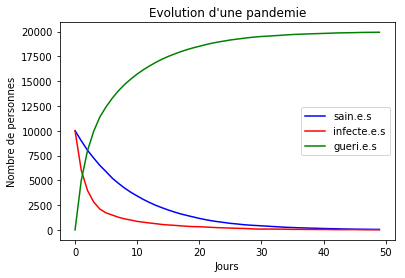

In [80]:
# Test de l'évolution d'une épidemie pour une population de 20 000 personnes durant 50 jours
generateurGraphique(20000,50)

Ce graphique possède la matrice de transition initiale et représente l'évolution d'une épidémie sur 20 000 personnes pendants 50 jours. <br/>
Nous pouvons observer que le fait d’avoir autant de chance d’être initialement sain ou infecté fait débuter nos courbes respectives à 10 000 personnes, soit la moitié de la population. <br/>
De plus, cela empêche notre courbe des infectés d’avoir un pic, contrairement aux premiers cas, et comme la probabilité de rester infecté est de 0,5 la courbe diminue grandement en cohérence avec la courbe des personnes saines. <br/>
Pour notre courbe des personnes guéries, il n'y a aucune grosse différence avec la courbe initiale.

##### Cas 5: On modifie uniquement la taille de la population, avec une population de 200 personnes 

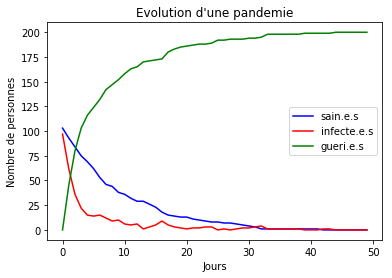

In [81]:
generateurGraphique(200,50)

Ce graphique représente l’évolution d’une épidémie pour une population de 200 personnes sur 50 jours, avec les même valeurs initiales. <br/>
Ce que nous pouvons constater est que le graphique est à peu près semblable au graphique initial. La différence est que les courbes sont moins lisses, puisque la population est nettement plus faible.
De plus, la courbe des infectés n’a pas un pic aussi précis que sur la courbe initiale. <br/>
Ainsi, nous pouvons conclure, qu’il est important d’avoir une population très élevée pour faire des observations d’épidémie aussi proches de la réalité que possible.

#### Remarques et propositions d'améliorations sur le modèle SIR

Après avoir travaillé avec le modèle SIR, on remarque qu'il ne fonctionne pas pour toutes les maladies. <br/>
En effet, le modèle SIR fonctionne dans le cas où une personne guérie devient immunisée d'une maladie, ce qui n'est malheureusement pas toujours le cas. De plus, le modèle SIR est ineffectif dans le cas où une personne est infectée mais non contagieuse. On peut également rajouter que ce modèle doit fixer une population homogène, ce qui peut être désavantageux.
Pour améliorer le modèle SIR, on pourrait proposer de prendre en compte l'âge et le sexe des individus pour commencer.